# Briefing

Utilização de Classificadores de Aprendizado de Máquina na Detecção de Células Parazitadas pelo Protozoário da Malária.

A malária é transmitida pela fêmea do mosquito do gênero *Anopheles*, e seu agente etiológico é um protozoário do gênero *Plasmodium* (Figura 1) [Rita et al. 2013]

**Figura 1** - *Plasmodium Falciparum* MSP1 *Protein*

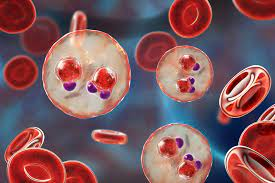

Estando presentes em mais de **90 países**, embora com prevalência diferente. Os mais comprometidos são a Índia, Brasil (**cerca de 300 mil casos por ano**), Afeganistão e países asiáticos, inclusive a China. Sendo tipicamente uma doença do mundo subdesenvolvido (MUÑOZ; FERNANDES, [201?])

Em 2019, a contagem global de casos de malária foi de **229 milhões**, uma estimativa anual que permaneceu praticamente inalterada nos últimos 4 anos. A doença ceifou cerca de **409 mil vidas em 2019** (ORGANIZAÇÃO PAN-AMERICANA DA SAÚDE, 2020).


O diagnóstico confirmatório da malária baseia-se no encontro de parasitos no sangue.

O método mais utilizado é a microscopia de gota espressa de sangue, colhida por punção digital e corada pelo método de Walker.

O exame cuidadoso da lâmina é considerado o "padrão-ouro" para a detecção e a identificação dos parasitos, que possibilita detectar densidades baixas de parasitos (5-10 parasitos/µL de sangue) quando é feito por **profissional experiente**. Contudo, nas condições de campo, a  capacidade de detecção é de 100 parasitos/µL de sangue (BRASIL, 2020).

60 minutos para detecção.


Aplicar e avaliar a viabilidade do uso de uma rede neural *MultiLayer Perceptron* no auxílio do diagnóstico de malária.

Para isso utilizaresmos a biblioteca disponível:

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

# Imports

## Libraries


In [ ]:
import cv2
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import skimage.feature as ski
from google.colab import drive

#Pré-processamento
from sklearn.preprocessing import StandardScaler

# Cross Validation
from sklearn.model_selection import cross_val_score
# Hold-out
from sklearn.model_selection import train_test_split


# Classificadores
## Tree
from sklearn.tree import DecisionTreeClassifier
## SVM
from sklearn import svm
## k-nn
from sklearn.neighbors import KNeighborsClassifier
## MLP
from sklearn.neural_network import MLPClassifier

# Métricas
from sklearn.metrics import accuracy_score


##Data


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
folder = '/content/gdrive/MyDrive/malaria/dataset/'

In [ ]:
base_completa = pd.read_csv(folder+'base_completa.csv')
base_completa

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,classe
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.219633,0.007742,0.314732,0.021446,0.314732,0.000000,0.000000,0.000000,0.184849,0.062334,0.000000,0.043870,0.000000,0.031313,0.000000,0.000000,0.000000,0.030734,0.253939,0.019403,0.314732,0.031112,...,0.146076,0.133324,0.090228,0.087201,0.047207,0.132565,0.069277,0.086988,0.122138,0.137808,0.140315,0.108812,0.098524,0.045862,0.154506,0.124193,0.142979,0.078858,0.096465,0.086381,0.101729,0.103286,0.061042,0.104644,0.074939,0.137620,0.202671,0.153179,0.086354,0.066262,0.101736,0.041504,0.156026,0.109238,0.086988,0.093506,0.122649,0.068923,0.085944,saudavel
1,0.316889,0.039180,0.262214,0.001534,0.316889,0.000584,0.040064,0.001168,0.089610,0.213278,0.004637,0.039349,0.005109,0.316889,0.001661,0.112174,0.002341,0.000951,0.277758,0.004390,0.215117,0.002659,0.316889,0.006021,0.004204,0.005629,0.026578,0.316889,0.056697,0.052129,0.004158,0.145439,0.000584,0.001292,0.003800,0.266803,0.017112,0.008982,0.012417,0.007588,...,0.090411,0.071396,0.085253,0.054717,0.031832,0.203406,0.123109,0.098858,0.047845,0.041852,0.073338,0.117847,0.115013,0.101043,0.137927,0.081101,0.088253,0.036646,0.066609,0.161889,0.183736,0.128251,0.094401,0.061836,0.040061,0.111292,0.203406,0.203406,0.155434,0.114222,0.044647,0.028262,0.120326,0.136476,0.172388,0.203406,0.184587,0.123080,0.081002,saudavel
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.185014,0.003896,0.257953,0.006161,0.315479,0.001553,0.000513,0.001217,0.142232,0.073824,0.000000,0.051818,0.000000,0.037003,0.000000,0.000000,0.000000,0.036112,0.262812,0.013849,0.315479,0.024700,...,0.111864,0.113102,0.094328,0.086962,0.050786,0.071486,0.079626,0.099285,0.122807,0.202443,0.128707,0.108763,0.057618,0.028743,0.125601,0.102858,0.165257,0.163974,0.149570,0.087166,0.068234,0.063974,0.018546,0.142835,0.158388,0.197943,0.153891,0.146233,0.072879,0.056760,0.024944,0.046227,0.081666,0.038705,0.068926,0.114883,0.120605,0.179409,0.131601,saudavel
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.316360,0.013140,0.117198,0.002778,0.316360,0.005732,0.046832,0.007267,0.145050,0.316360,0.009877,0.011757,0.008154,0.198514,0.001533,0.138605,0.002694,0.099464,0.316360,0.015191,0.214889,0.000000,0.263742,0.000000,0.000370,0.000292,0.203861,0.094357,0.063834,0.063925,0.008233,...,0.014036,0.011479,0.025239,0.022912,0.030399,0.038368,0.020508,0.020901,0.018961,0.031440,0.029271,0.028302,0.005484,0.012349,0.399968,0.048465,0.251980,0.003482,0.399968,0.001976,0.002202,0.014590,0.399968,0.034228,0.021361,0.021772,0.012798,0.015593,0.009332,0.018083,0.026080,0.023018,0.032195,0.016865,0.017730,0.014381,0.019742,0.026395,0.029297,saudavel
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.152908,0.000000,0.215465,0.003161,0.287968,0.001831,0.000578,0.000358,0.120893,0.130976,0.003212,0.188015,0.039719,0.287968,0.011977,0.002391,0.001295,0.128376,0.210309,0.002867,0.216298,0.004858,0.270723,0.000507,0.001156,0.000000,0.119746,0.191361,0.008523,0.228315,0.016380,...,0.093439,0.098360,0.118424,0.134970,0.076196,0.189470,0.092951,0.085093,0.067353,0.093555,0.054912,0.097596,0.089244,0.063504,0.149924,0.061650,0.114054,0.077076,0.106647,0.080607,0.087342,0.089779,0.090277,0.107384,0.109480,0.099495,0.161902,0.143575,0.143853,0.130303,0.084741,0.107632,0.148100,0.107016,0.137849,0.110751,0.113168,0.115931,0.085241,saudavel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
base_completa_70 = pd.read_csv(folder+'base_completa_70.csv')
base_completa_70

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,classe
0,-0.800885,-0.127907,-1.118607,0.422056,-0.365478,-0.208737,0.129566,-0.310453,0.358002,-0.042962,0.173443,-0.231428,-0.000463,0.194073,-0.220572,0.012254,-0.234384,-0.075511,0.041671,0.320505,0.255771,-0.271065,0.174298,-0.000985,0.188685,0.302891,0.193370,-0.036782,0.268544,0.027711,-0.198368,-0.095536,0.122313,-0.189418,-0.184514,-0.148880,-0.000188,-0.317677,0.120288,0.030816,...,0.007852,-0.009479,-0.005073,-0.004226,-0.007470,-0.005955,-0.008642,0.002957,0.008175,-0.009283,-0.006036,0.013179,-0.003643,0.001082,-0.004367,0.007550,0.012257,0.003412,0.006321,-0.001435,0.008295,0.020641,-0.002863,-0.008304,-0.008172,0.000940,0.001436,-0.006777,0.005721,0.002654,0.002460,-0.013347,-0.002865,0.006477,-0.004337,0.001858,0.004577,-0.002081,0.002014,saudavel
1,-1.112906,-0.078094,-0.048163,-0.137572,0.095455,0.129049,-0.029178,0.466757,0.138500,0.255023,-0.026237,-0.300597,0.133010,0.521153,0.023661,0.090049,0.071127,0.220778,0.265234,-0.259593,0.088190,-0.047439,0.334684,-0.037246,-0.288488,0.054391,-0.096987,0.014165,-0.063869,-0.037097,-0.017460,0.074921,0.067817,-0.235245,-0.161142,-0.342905,-0.221833,-0.084279,-0.221703,0.231133,...,-0.001184,0.000323,-0.008222,0.009469,0.006580,0.007858,0.006299,0.009894,0.005567,0.003251,-0.011716,0.000318,-0.009540,-0.000974,0.019546,-0.019471,-0.010538,-0.014581,0.015004,0.000374,-0.007678,0.007982,0.003885,-0.004396,0.015076,0.001312,-0.001221,0.013760,0.012756,-0.019873,-0.006056,-0.012862,-0.009802,0.002002,-0.006657,0.002530,-0.018399,0.003519,0.005106,saudavel
2,-0.418159,0.041575,-1.193468,0.405295,-0.449510,0.026221,-0.276051,-0.150121,0.077471,0.293131,-0.092016,0.122888,-0.018685,0.044825,-0.112340,-0.127425,0.132226,0.104224,-0.118805,-0.070402,0.300349,-0.037330,0.135835,-0.067648,0.019539,-0.113150,0.276852,0.127149,0.145240,0.347202,0.013719,0.081960,-0.127205,-0.130342,0.178104,0.032593,0.060501,0.023976,0.024796,0.049120,...,0.009332,-0.016126,0.009402,0.003834,-0.004227,-0.005203,-0.001277,-0.013539,-0.007732,-0.003470,-0.006970,-0.015265,0.014482,-0.001896,-0.004595,-0.006629,-0.001353,0.001915,-0.007490,0.001477,0.014130,-0.001569,-0.011537,0.009111,0.002241,0.006390,0.006087,-0.004337,-0.003542,-0.003534,-0.002897,0.000970,-0.011391,-0.005102,-0.006089,0.009196,0.011392,-0.013367,-0.006569,saudavel
3,-0.168842,0.574866,1.096359,0.803030,-0.519264,-0.129436,0.769318,-0.109301,0.717793,-0.078790,-0.099115,-0.925692,-0.666286,-0.721502,0.971760,0.121315,-0.387605,0.173022,0.005397,-0.195056,0.464039,-0.088956,0.210982,0.428115,-0.060904,0.489225,0.018359,-0.094973,0.033091,-0.154219,-0.243100,-0.032042,-0.422947,0.108663,0.209496,-0.007313,-0.171701,0.246695,-0.202437,0.024496,...,-0.007476,-0.005654,0.009747,-0.003630,0.012714,-0.008306,0.014057,-0.004556,0.004501,-0.000358,-0.006277,-0.012057,-0.002738,-0.000895,0.009415,0.005918,0.004220,0.005725,0.001449,0.002228,0.014132,-0.004640,0.004696,-0.010674,-0.010128,-0.022858,-0.005061,0.008729,-0.009562,0.014896,-0.016246,0.000469,-0.000779,-0.003903,0.004105,-0.000583,0.002721,0.005342,0.004101,saudavel
4,-1.373024,-0.206016,-0.346065,0.078609,-0.092544,-0.317090,0.052357,-0.040050,-0.177057,-0.182608,0.113848,0.132140,0.103628,-0.138031,-0.096601,0.077997,-0.140785,0.034929,0.026434,0.113462,0.041045,-0.160090,0.025202,-0.124881,0.087513,0.060743,-0.156515,0.068098,0.041846,-0.113006,-0.088118,0.006977,0.089649,-0.037655,0.014012,0.077236,0.026231,0.001631,-0.073659,0.061545,...,0.001118,0.015945,-0.001096,-0.002890,-0.014052,0.002256,0.003737,0.011507,-0.000585,-0.000289,-0.003714,0.004640,-0.014219,-0.005949,0.011006,0.002797,-0.000489,-0.002433,-0.001251,0.008610,0.001418,0.004367,0.006942,0.002109,0.001934,-0.013407,0.003861,-0.010273,-0.00183

In [ ]:
base_completa_30 = pd.read_csv(folder+'base_completa_30.csv')
base_completa_30

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,classe
0,-0.800885,-0.127907,-1.118607,0.422056,-0.365478,-0.208737,0.129566,-0.310453,0.358002,-0.042962,0.173443,-0.231428,-0.000463,0.194073,-0.220572,0.012254,-0.234384,-0.075511,0.041671,0.320505,0.255771,-0.271065,0.174298,-0.000985,0.188685,0.302892,0.193370,-0.036782,0.268545,0.027711,-0.198368,-0.095536,0.122313,-0.189418,-0.184514,-0.148880,-0.000188,-0.317677,0.120288,0.030816,...,-0.033153,0.046867,-0.048281,-0.021659,-0.024201,0.087197,0.002673,0.002927,-0.009241,0.029811,0.027475,0.031266,-0.008743,0.001622,0.004236,0.031665,0.003883,-0.006406,-0.009832,0.002492,0.009963,-0.028647,-0.015925,-0.007543,0.059876,-0.021612,0.019522,0.024092,-0.002162,0.015907,0.007858,-0.010659,0.024588,0.012466,-0.038161,-0.016204,-0.031402,0.019153,-0.038830,saudavel
1,-1.112906,-0.078094,-0.048163,-0.137572,0.095455,0.129049,-0.029178,0.466757,0.138500,0.255023,-0.026237,-0.300597,0.133010,0.521153,0.023661,0.090049,0.071127,0.220778,0.265234,-0.259593,0.088190,-0.047439,0.334684,-0.037246,-0.288488,0.054391,-0.096988,0.014165,-0.063869,-0.037097,-0.017460,0.074921,0.067817,-0.235245,-0.161142,-0.342905,-0.221833,-0.084278,-0.221703,0.231133,...,-0.035896,0.006759,-0.042007,0.011415,-0.038820,-0.011232,-0.101560,-0.001608,0.077890,0.045899,0.032708,-0.005915,-0.025215,-0.004445,-0.063757,-0.022971,0.039491,0.051973,-0.053765,-0.058648,0.002655,-0.055784,0.048741,-0.046235,0.018443,0.029842,-0.035966,0.014856,0.040831,-0.046935,-0.012293,-0.020579,0.026131,0.019079,-0.009045,0.030130,-0.025822,-0.008647,-0.025267,saudavel
2,-0.418159,0.041575,-1.193468,0.405295,-0.449510,0.026221,-0.276051,-0.150121,0.077471,0.293131,-0.092016,0.122888,-0.018685,0.044825,-0.112340,-0.127425,0.132226,0.104224,-0.118805,-0.070402,0.300349,-0.037330,0.135835,-0.067648,0.019539,-0.113150,0.276852,0.127149,0.145239,0.347202,0.013719,0.081960,-0.127205,-0.130342,0.178104,0.032593,0.060501,0.023976,0.024796,0.049120,...,-0.006400,0.020817,0.027226,0.000322,0.006831,-0.001268,-0.019861,0.056948,-0.018211,-0.036862,0.034487,-0.040639,-0.012241,0.008250,-0.011736,0.005731,-0.006991,-0.080492,0.023821,-0.025835,-0.021787,0.004398,0.007913,0.064252,-0.055791,0.004403,-0.008061,-0.011347,-0.047059,0.020883,0.001610,-0.013847,-0.014448,-0.027832,0.018972,-0.049334,-0.005974,0.006139,-0.040449,saudavel
3,-0.168842,0.574866,1.096359,0.803030,-0.519264,-0.129436,0.769318,-0.109301,0.717793,-0.078790,-0.099115,-0.925692,-0.666286,-0.721502,0.971760,0.121315,-0.387605,0.173022,0.005397,-0.195056,0.464039,-0.088956,0.210982,0.428115,-0.060904,0.489225,0.018359,-0.094973,0.033091,-0.154219,-0.243100,-0.032042,-0.422947,0.108662,0.209497,-0.007312,-0.171701,0.246695,-0.202438,0.024496,...,0.046485,0.034237,-0.005121,-0.033335,0.006137,0.005468,0.049790,-0.055798,-0.010632,0.015304,0.028155,-0.019735,-0.073638,0.015729,-0.056806,0.007014,0.028505,-0.005499,-0.051574,0.012323,0.011692,-0.029002,-0.009570,-0.020344,0.017364,0.044494,0.004896,-0.031914,-0.003159,-0.025068,-0.054094,0.007521,-0.027884,-0.012527,-0.031745,-0.008427,0.022923,0.043904,-0.039844,saudavel
4,-1.373024,-0.206016,-0.346065,0.078609,-0.092544,-0.317090,0.052357,-0.040050,-0.177057,-0.182608,0.113848,0.132140,0.103628,-0.138031,-0.096601,0.077997,-0.140785,0.034929,0.026434,0.113462,0.041045,-0.160090,0.025202,-0.124881,0.087513,0.060743,-0.156515,0.068098,0.041846,-0.113006,-0.088118,0.006977,0.089649,-0.037656,0.014012,0.077236,0.026230,0.001631,-0.073659,0.061545,...,0.027637,0.002948,0.022747,0.006188,0.009868,0.011673,-0.029423,0.015621,0.043224,0.006354,-0.022483,0.009789,0.007624,0.038857,0.004353,-0.026631,-0.010827,0.010660,0.012201,-0.027546,-0.001767,0.039486,-0.001402,0.010995,-0.020018,-0.028363,-0.010484,0.059143,0.014278

In [ ]:
base_completa_10 = pd.read_csv(folder+'base_completa_10.csv')
base_completa_10

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,classe
0,-0.800885,-0.127907,-1.118607,0.422056,-0.365478,-0.208737,0.129566,-0.310453,0.358002,-0.042962,0.173443,-0.231428,-0.000463,0.194073,-0.220572,0.012254,-0.234384,-0.075511,0.041671,0.320505,0.255771,-0.271065,0.174298,-0.000985,0.188685,0.302891,0.193370,-0.036782,0.268545,0.027711,-0.198368,-0.095535,0.122312,-0.189417,-0.184515,-0.148881,-0.000190,-0.317677,0.120293,0.030814,...,-0.049381,0.004472,-0.078571,0.055591,-0.009662,0.023165,0.113242,-0.073879,-0.023032,0.070731,-0.104777,-0.049526,-0.001566,0.101259,0.026340,0.054836,-0.092075,-0.080312,-0.030831,0.098130,0.043453,0.009895,-0.136532,-0.076376,-0.025149,0.035410,-0.006353,0.032950,-0.011111,0.002890,0.011894,-0.088355,0.015540,-0.017596,-0.108819,-0.025828,-0.002565,0.077144,0.050618,saudavel
1,-1.112906,-0.078094,-0.048163,-0.137572,0.095455,0.129049,-0.029178,0.466757,0.138500,0.255023,-0.026237,-0.300597,0.133010,0.521153,0.023661,0.090049,0.071127,0.220778,0.265234,-0.259593,0.088190,-0.047439,0.334685,-0.037246,-0.288488,0.054391,-0.096988,0.014165,-0.063870,-0.037096,-0.017461,0.074921,0.067816,-0.235248,-0.161140,-0.342903,-0.221835,-0.084275,-0.221707,0.231131,...,0.100801,0.057299,-0.132811,0.298649,0.023920,-0.220775,0.055625,-0.000306,0.005900,-0.172403,0.046722,-0.080842,-0.009483,-0.112791,0.170189,-0.016691,0.126627,0.009756,-0.015627,0.168494,-0.059026,0.170837,-0.016675,-0.136132,-0.058100,-0.119295,0.057433,0.120264,-0.077522,-0.063780,0.078012,0.023803,0.068409,0.063959,0.112977,-0.056424,0.130933,0.010256,0.074602,saudavel
2,-0.418159,0.041575,-1.193468,0.405295,-0.449510,0.026221,-0.276051,-0.150121,0.077471,0.293131,-0.092016,0.122888,-0.018685,0.044825,-0.112340,-0.127425,0.132226,0.104224,-0.118805,-0.070402,0.300349,-0.037330,0.135835,-0.067648,0.019538,-0.113150,0.276852,0.127149,0.145240,0.347202,0.013719,0.081960,-0.127205,-0.130340,0.178103,0.032591,0.060500,0.023974,0.024799,0.049117,...,-0.055622,0.045438,-0.077794,0.118667,-0.074331,0.027798,0.056094,-0.047609,-0.051406,0.161148,-0.016713,0.032394,-0.031554,-0.030871,0.049245,-0.031294,0.049894,-0.050213,0.065210,0.090633,-0.003455,0.044109,-0.025966,-0.006609,-0.017983,0.040587,-0.093355,-0.055905,-0.054394,-0.024996,0.024483,-0.108878,0.062812,-0.072701,-0.014972,-0.012073,0.010711,0.010456,0.053370,saudavel
3,-0.168842,0.574866,1.096359,0.803030,-0.519264,-0.129436,0.769318,-0.109301,0.717793,-0.078790,-0.099115,-0.925692,-0.666286,-0.721502,0.971760,0.121315,-0.387605,0.173022,0.005397,-0.195056,0.464039,-0.088956,0.210982,0.428115,-0.060904,0.489225,0.018359,-0.094972,0.033091,-0.154218,-0.243098,-0.032042,-0.422946,0.108665,0.209493,-0.007314,-0.171698,0.246691,-0.202434,0.024503,...,0.117725,-0.069333,0.104323,0.215277,-0.170125,0.000795,-0.042200,0.094660,-0.052084,0.045831,-0.070491,0.039017,0.018336,-0.039566,-0.056716,0.058000,0.077543,-0.258290,-0.062176,0.115604,0.045558,-0.225465,-0.019101,0.095287,-0.192127,-0.035724,0.022220,-0.003420,0.008316,-0.022923,-0.011873,0.097905,-0.013696,-0.205426,-0.067532,-0.125597,0.026003,0.068598,-0.011924,saudavel
4,-1.373024,-0.206016,-0.346065,0.078609,-0.092544,-0.317090,0.052357,-0.040050,-0.177057,-0.182608,0.113848,0.132140,0.103628,-0.138031,-0.096601,0.077997,-0.140785,0.034929,0.026434,0.113462,0.041045,-0.160090,0.025202,-0.124881,0.087513,0.060743,-0.156515,0.068098,0.041846,-0.113006,-0.088118,0.006977,0.089648,-0.037656,0.014012,0.077236,0.026231,0.001631,-0.073660,0.061546,...,0.010899,0.048345,0.015229,0.118826,-0.057064,-0.043265,0.003033,0.039549,0.025499,0.101687,-0.044582,0.072827,0.005803,0.035424,0.022955,0.048613,0.007525,-0.014254,0.000830,0.039195,-0.040215,0.080828,0.012506,-0.042801,-0.052248,-0.028581,-0.003009,0.018786,0.024046,-0.051507,-0.063504,-0.024714,0.006731,0

In [ ]:
label = base_completa["classe"]
label

0        saudavel
1        saudavel
2        saudavel
3        saudavel
4        saudavel
           ...   
26802      doente
26803      doente
26804      doente
26805      doente
26806      doente
Name: classe, Length: 26807, dtype: object

In [ ]:
label_temp = pd.get_dummies(label)
label_temp

,doente,saudavel
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
26802,1,0
26803,1,0
26804,1,0
26805,1,0


In [ ]:
label_two = pd.concat((label_temp, label), axis=1)
label_two

,doente,saudavel,classe
0,0,1,saudavel
1,0,1,saudavel
2,0,1,saudavel
3,0,1,saudavel
4,0,1,saudavel
...,...,...,...
26802,1,0,doente
26803,1,0,doente
26804,1,0,doente
26805,1,0,doente


In [ ]:

label_two = label_two.drop(["classe"], axis=1)
label_two = label_two.drop(["doente"], axis=1)
label = label_two.rename(columns={"saudavel": "classe"})
label

,classe
0,1
1,1
2,1
3,1
4,1
...,...
26802,0
26803,0
26804,0
26805,0


In [ ]:
label_70 = base_completa_70["classe"]
label_70

0        saudavel
1        saudavel
2        saudavel
3        saudavel
4        saudavel
           ...   
26802      doente
26803      doente
26804      doente
26805      doente
26806      doente
Name: classe, Length: 26807, dtype: object

In [ ]:
label_temp_70 = pd.get_dummies(label_70)
label_two_70 = pd.concat((label_temp_70, label_70), axis=1)
label_two_70 = label_two_70.drop(["classe"], axis=1)
label_two_70 = label_two_70.drop(["doente"], axis=1)
label_70 = label_two_70.rename(columns={"saudavel": "classe"})
label_70

,classe
0,1
1,1
2,1
3,1
4,1
...,...
26802,0
26803,0
26804,0
26805,0


In [ ]:
label_30 = base_completa_30["classe"]
label_30

0        saudavel
1        saudavel
2        saudavel
3        saudavel
4        saudavel
           ...   
26802      doente
26803      doente
26804      doente
26805      doente
26806      doente
Name: classe, Length: 26807, dtype: object

In [ ]:
label_temp_30 = pd.get_dummies(label_30)
label_two_30 = pd.concat((label_temp_30, label_30), axis=1)
label_two_30 = label_two_30.drop(["classe"], axis=1)
label_two_30 = label_two_30.drop(["doente"], axis=1)
label_30 = label_two_30.rename(columns={"saudavel": "classe"})
label_30

,classe
0,1
1,1
2,1
3,1
4,1
...,...
26802,0
26803,0
26804,0
26805,0


In [ ]:
label_10 = base_completa_10["classe"]
label_10

0        saudavel
1        saudavel
2        saudavel
3        saudavel
4        saudavel
           ...   
26802      doente
26803      doente
26804      doente
26805      doente
26806      doente
Name: classe, Length: 26807, dtype: object

In [ ]:
label_temp_10 = pd.get_dummies(label_10)
label_two_10 = pd.concat((label_temp_10, label_10), axis=1)
label_two_10 = label_two_10.drop(["classe"], axis=1)
label_two_10 = label_two_10.drop(["doente"], axis=1)
label_10 = label_two_10.rename(columns={"saudavel": "classe"})
label_10

,classe
0,1
1,1
2,1
3,1
4,1
...,...
26802,0
26803,0
26804,0
26805,0


In [ ]:
base_completa = base_completa.drop(["classe"], axis=1)
base_completa_70 = base_completa_70.drop(["classe"], axis=1)
base_completa_30 = base_completa_30.drop(["classe"], axis=1)
base_completa_10 = base_completa_10.drop(["classe"], axis=1)

#Building

##Hold-out


In [ ]:
# Dados de treino e teste base_completa
X_train,X_test,y_train,y_test = train_test_split(base_completa,label,test_size=0.3)
y_test

,classe
17413,0
13572,0
382,1
16839,0
20897,0
...,...
5711,1
23314,0
14880,0
10989,1


In [ ]:
# Dados de treino e teste base_completa_70
X_train_70,X_test_70,y_train_70,y_test_70 = train_test_split(base_completa_70,label_70,test_size=0.3)
y_test_70

,classe
19908,0
19823,0
11965,1
23468,0
20014,0
...,...
11369,1
16939,0
11043,1
13930,0


In [ ]:
# Dados de treino e teste base_completa_30
X_train_30,X_test_30,y_train_30,y_test_30 = train_test_split(base_completa_30,label_30,test_size=0.3)
y_test_30

,classe
22272,0
18226,0
6714,1
18840,0
13649,0
...,...
18106,0
15199,0
4297,1
14517,0


In [ ]:
# Dados de treino e teste base_completa_10
X_train_10,X_test_10,y_train_10,y_test_10 = train_test_split(base_completa_10,label_10,test_size=0.3)
y_test_10

,classe
23756,0
11170,1
8573,1
7465,1
1312,1
...,...
9827,1
1837,1
26218,0
18580,0


##Training


###MLP

In [ ]:
#MLP base_completa
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf_mlp.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
#MLP base_completa_70
clf_mlp_70 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf_mlp_70.fit(X_train_70, y_train_70)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
#MLP base_completa_30
clf_mlp_30 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf_mlp_30.fit(X_train_30, y_train_30)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
#MLP base_completa_10
clf_mlp_10 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf_mlp_10.fit(X_train_10, y_train_10)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

###Tree

In [ ]:
#tree base_completa
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#tree base_completa_70
clf_tree_70 = DecisionTreeClassifier()
clf_tree_70.fit(X_train_70, y_train_70)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#tree base_completa_30
clf_tree_30 = DecisionTreeClassifier()
clf_tree_30.fit(X_train_30, y_train_30)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#tree base_completa_10
clf_tree_10 = DecisionTreeClassifier()
clf_tree_10.fit(X_train_10, y_train_10)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

###SVM

In [ ]:
#svm base_completa
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#svm base_completa_70
clf_svm_70 = svm.SVC()
clf_svm_70.fit(X_train_70, y_train_70)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#svm base_completa_30
clf_svm_30 = svm.SVC()
clf_svm_30.fit(X_train_30, y_train_30)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#svm base_completa_10
clf_svm_10 = svm.SVC()
clf_svm_10.fit(X_train_10, y_train_10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

###K-NN

####1-NN


In [ ]:
#1-nn base_completa
nn1 = KNeighborsClassifier(n_neighbors=1)
nn1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
#1-nn base_completa_70
nn1_70 = KNeighborsClassifier(n_neighbors=1)
nn1_70.fit(X_train_70, y_train_70)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
#1-nn base_completa_30
nn1_30 = KNeighborsClassifier(n_neighbors=1)
nn1_30.fit(X_train_30, y_train_30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
#1-nn base_completa_10
nn1_10 = KNeighborsClassifier(n_neighbors=1)
nn1_10.fit(X_train_10, y_train_10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

####2-NN


In [ ]:
#2-nn base_completa
nn2 = KNeighborsClassifier(n_neighbors=2)
nn2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
#2-nn base_completa_70
nn2_70 = KNeighborsClassifier(n_neighbors=2)
nn2_70.fit(X_train_70, y_train_70)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
#2-nn base_completa_30
nn2_30 = KNeighborsClassifier(n_neighbors=2)
nn2_30.fit(X_train_30, y_train_30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
#2-nn base_completa_10
nn2_10 = KNeighborsClassifier(n_neighbors=2)
nn2_10.fit(X_train_10, y_train_10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

####3-NN

In [ ]:
#3-nn base_completa
nn3 = KNeighborsClassifier(n_neighbors=3)
nn3.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#3-nn base_completa_70
nn3_70 = KNeighborsClassifier(n_neighbors=3)
nn3_70.fit(X_train_70, y_train_70)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#3-nn base_completa_30
nn3_30 = KNeighborsClassifier(n_neighbors=3)
nn3_30.fit(X_train_30, y_train_30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#3-nn base_completa_10
nn3_10 = KNeighborsClassifier(n_neighbors=3)
nn3_10.fit(X_train_10, y_train_10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

####5-NN

In [ ]:
#5-nn base_completa
nn5 = KNeighborsClassifier(n_neighbors=5)
nn5.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#5-nn base_completa_70
nn5_70 = KNeighborsClassifier(n_neighbors=5)
nn5_70.fit(X_train_70, y_train_70)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#5-nn base_completa_30
nn5_30 = KNeighborsClassifier(n_neighbors=5)
nn5_30.fit(X_train_30, y_train_30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#5-nn base_completa_10
nn5_10 = KNeighborsClassifier(n_neighbors=5)
nn5_10.fit(X_train_10, y_train_10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

##Prediction

###MLP

In [ ]:
#mlp base_completa
pred_mlp = clf_mlp.predict([X_test.iloc[1]])
pred_mlp

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=uint8)

In [ ]:
#mlp base_completa_70
pred_mlp_70 = clf_mlp_70.predict([X_test_70.iloc[1]])
pred_mlp_70

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=uint8)

In [ ]:
#mlp base_completa_30
pred_mlp_30 = clf_mlp_30.predict([X_test_30.iloc[1]])
pred_mlp_30

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=uint8)

In [ ]:
#mlp base_completa_10
pred_mlp_10 = clf_mlp_10.predict([X_test_10.iloc[1]])
pred_mlp_10

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1], dtype=uint8)

###Tree

In [ ]:
#tree base_completa
pred_tree = clf_tree.predict([X_test.iloc[1]])
pred_tree

array([1], dtype=uint8)

In [ ]:
#tree base_completa_70
pred_tree_70 = clf_tree_70.predict([X_test_70.iloc[1]])
pred_tree_70

array([1], dtype=uint8)

In [ ]:
#tree base_completa_30
pred_tree_30 = clf_tree_30.predict([X_test_30.iloc[1]])
pred_tree_30

array([1], dtype=uint8)

In [ ]:
#tree base_completa_10
pred_tree_10 = clf_tree_10.predict([X_test_10.iloc[1]])
pred_tree_10

array([0], dtype=uint8)

###SVM

In [ ]:
#svm base_completa
pred_svm = clf_svm.predict([X_test.iloc[1]])
pred_svm

array([1], dtype=uint8)

In [ ]:
#svm base_completa_70
pred_svm_70 = clf_svm_70.predict([X_test_70.iloc[1]])
pred_svm_70

array([1], dtype=uint8)

In [ ]:
#svm base_completa_30
pred_svm_30 = clf_svm_30.predict([X_test_30.iloc[1]])
pred_svm_30

array([1], dtype=uint8)

In [ ]:
#svm base_completa_10
pred_svm_10 = clf_svm_10.predict([X_test_10.iloc[1]])
pred_svm_10

array([0], dtype=uint8)

###K-NN

####1-NN

In [ ]:
#1-nn base_completa
pred_1nn = nn1.predict([X_test.iloc[1]])
pred_1nn

array([1], dtype=uint8)

In [ ]:
#1-nn base_completa_70
pred_1nn_70 = nn1_70.predict([X_test_70.iloc[1]])
pred_1nn_70

array([1], dtype=uint8)

In [ ]:
#1-nn base_completa_30
pred_1nn_30 = nn1_30.predict([X_test_30.iloc[1]])
pred_1nn_30

array([1], dtype=uint8)

In [ ]:
#1-nn base_completa_10
pred_1nn_10 = nn1_10.predict([X_test_10.iloc[1]])
pred_1nn_10

array([0], dtype=uint8)

####2-NN

In [ ]:
#2-nn base_completa
pred_2nn = nn2.predict([X_test.iloc[1]])
pred_2nn

array([1], dtype=uint8)

In [ ]:
#2-nn base_completa_70
pred_2nn_70 = nn2_70.predict([X_test_70.iloc[1]])
pred_2nn_70

array([1], dtype=uint8)

In [ ]:
#2-nn base_completa_30
pred_2nn_30 = nn2_30.predict([X_test_30.iloc[1]])
pred_2nn_30

array([1], dtype=uint8)

In [ ]:
#2-nn base_completa_10
pred_2nn_10 = nn2_10.predict([X_test_10.iloc[1]])
pred_2nn_10

array([0], dtype=uint8)

####3-NN

In [ ]:
#3-nn base_completa
pred_3nn = nn3.predict([X_test.iloc[1]])
pred_3nn

array([1], dtype=uint8)

In [ ]:
#3-nn base_completa_70
pred_3nn_70 = nn3_70.predict([X_test_70.iloc[1]])
pred_3nn_70

array([1], dtype=uint8)

In [ ]:
#3-nn base_completa_30
pred_3nn_30 = nn3_30.predict([X_test_30.iloc[1]])
pred_3nn_30

array([1], dtype=uint8)

In [ ]:
#3-nn base_completa_10
pred_3nn_10 = nn3_10.predict([X_test_10.iloc[1]])
pred_3nn_10

array([0], dtype=uint8)

####5-NN

In [ ]:
#5-nn base_completa
pred_5nn = nn5.predict([X_test.iloc[1]])
pred_5nn

array([1], dtype=uint8)

In [ ]:
#5-nn base_completa_70
pred_5nn_70 = nn5_70.predict([X_test_70.iloc[1]])
pred_5nn_70

array([1], dtype=uint8)

In [ ]:
#5-nn base_completa_30
pred_5nn_30 = nn5_30.predict([X_test_30.iloc[1]])
pred_5nn_30

array([1], dtype=uint8)

In [ ]:
#5-nn base_completa_10
pred_5nn_10 = nn5_10.predict([X_test_10.iloc[1]])
pred_5nn_10

array([0], dtype=uint8)

##Evaluating Performance

###Hold-out Accuracy

####MLP

In [ ]:
#testando mlp base_completa
accuracy_score(y_test, clf_mlp.predict(X_test))

0.4921049359691657

In [ ]:
#testando mlp base_completa_70
accuracy_score(y_test_70, clf_mlp_70.predict(X_test_70))

0.9736416759915455

In [ ]:
#testando mlp base_completa_30
accuracy_score(y_test_30, clf_mlp_30.predict(X_test_30))

0.8295412159641925

In [ ]:
#testando mlp base_completa_10
accuracy_score(y_test_10, clf_mlp_10.predict(X_test_10))

0.8223299763769738

####Tree

In [ ]:
#testando tree base_completa
accuracy_score(y_test, clf_tree.predict(X_test))

0.6874300634091757

In [ ]:
#testando tree base_completa_70
accuracy_score(y_test_70, clf_tree_70.predict(X_test_70))

0.9421857515852294

In [ ]:
#testando tree base_completa_30
accuracy_score(y_test_30, clf_tree_30.predict(X_test_30))

0.9433047370384186

In [ ]:
#testando tree base_completa_10
accuracy_score(y_test_10, clf_tree_10.predict(X_test_10))

0.9526296158149944

####SVM

In [ ]:
#testando svm base_completa
accuracy_score(y_test, clf_svm.predict(X_test))

0.794479671764267

In [ ]:
#testando svm base_completa_70
accuracy_score(y_test_70, clf_svm_70.predict(X_test_70))

1.0

In [ ]:
#testando svm base_completa_30
accuracy_score(y_test_30, clf_svm_30.predict(X_test_30))

1.0

In [ ]:
#testando svm base_completa_10
accuracy_score(y_test_10, clf_svm_10.predict(X_test_10))

1.0

####K-NN


#####1-NN

In [ ]:
#1-nn base_completa
accuracy_score(y_test, nn1.predict(X_test))

0.6117120477433793

In [ ]:
#1-nn base_completa_70
accuracy_score(y_test_70, nn1_70.predict(X_test_70))

0.9988810145468109

In [ ]:
#1-nn base_completa_30
accuracy_score(y_test_30, nn1_30.predict(X_test_30))

0.999627004848937

In [ ]:
#1-nn base_completa_10
accuracy_score(y_test_10, nn1_10.predict(X_test_10))

1.0

#####2-NN

In [ ]:
#2-nn base_completa
accuracy_score(y_test, nn2.predict(X_test))

0.6273778440880269

In [ ]:
#2-nn base_completa_70
accuracy_score(y_test_70, nn2_70.predict(X_test_70))

0.9985080193957478

In [ ]:
#2-nn base_completa_30
accuracy_score(y_test_30, nn2_30.predict(X_test_30))

0.999627004848937

In [ ]:
#2-nn base_completa_10
accuracy_score(y_test_10, nn2_10.predict(X_test_10))

1.0

#####3-NN

In [ ]:
#3-nn base_completa
accuracy_score(y_test, nn3.predict(X_test))

0.6165609847071988

In [ ]:
#3-nn base_completa_70
accuracy_score(y_test_70, nn3_70.predict(X_test_70))

0.9981350242446848

In [ ]:
#3-nn base_completa_30
accuracy_score(y_test_30, nn3_30.predict(X_test_30))

0.9992540096978739

In [ ]:
#3-nn base_completa_10
accuracy_score(y_test_10, nn3_10.predict(X_test_10))

1.0

#####5-NN

In [ ]:
#5-nn base_completa
accuracy_score(y_test, nn5.predict(X_test))

0.6072361059306229

In [ ]:
#5-nn base_completa_70
accuracy_score(y_test_70, nn5_70.predict(X_test_70))

0.9970160387914957

In [ ]:
#5-nn base_completa_30
accuracy_score(y_test_30, nn5_30.predict(X_test_30))

0.9988810145468109

In [ ]:
#5-nn base_completa_10
accuracy_score(y_test_10, nn5_10.predict(X_test_10))

1.0